# 한승민이조 !!!! 만관부!!!
### 한승민, 오지훈, 신용석, 신동욱

# 코로나바이러스의 확진을 막기위해서 어떻게 해야 했을까?

### 우리가 알고 있었던 것들이 정말 맞는 것일까? 데이터를 통해서 확인해 보자
코로나 바이러스가 퍼지는 것을 막고 감염을 막기위해서 우리는 어떤 행동을 했어야 했을까?  
이제는 그 방법에 대해서 많이 알 것이라고 생각한다. 과거의 데이터를 통해서 그러한 내용들이 맞는 것일지 우리가 몰랐던 다른 무엇인가를 발견할 수 있을지 한번 확인해 보고자 한다.

### 데이터를 들여다보자

우리가 사용하는 데이터는 과거의 데이터이다.  
제공된 전체 11개의 파일을 조사한결과 다음과 같은 기간동안 조사되었다.  
특이 사항이 없다면 우리는 2020년 1월 20일 ~ 2020년6월 30일 까지의 데이터를 사용하게 될 것이다.

- PatientInfo.csv 2020-01-20 ~ 2020-06-30
- Policy.csv 2020-01-03 ~ 2020-06-10
- SearchTrend.csv 2016-01-01 ~ 2020-06-29
- SeoulFloating 2020-01-01 ~ 2020-05-31
- Time.csv 2020-01-20 ~ 2020-06-30
- TimeAge.csv 2020-03-02 ~ 2020-06-30
- TimeGender.csv 2020-03-02 ~ 2020-06-30
- TimeProvince.csv 2020-01-20 ~ 2020-06-30
- Weather.csv 2020-01-20 ~ 2020-06-30

코로나 감염병의 감염은 전염성 바이러스에 의해서 발생한다.  
사람이 많은 곳에서 사람들과 접촉함으로 인해서 호흡기로 바이러스가 침투하여 감염되는 병이다.  
- 사람들과의 접촉을 최대한 피하면서 움직이거나  
- 움직임을 최소화해야 한다. 

위와 같은 특징으로 미루어 보아 
접촉성과 유동성은 코로나 바이러스에 대한 감염과 확산에 큰 영향을 미치는 요인이라고 생각되어 진다.

우리는 주어진 데이터를 사용해서 다음과 같은 특징들을 확인할 예정이다.

- 접촉성이 존재 하는가?
많은 사람들과 접촉한 사람들이 감염확산에 기여 했는가?
접촉성과 유동성이 많은 집단은 어떤 집단인가?

- 유동성
정말 많이 움직인 사람들이 감염확산에 기여 했는가?


이를 확인하기 위해서 다음과 같이 데이터를 분석해 보려고 한다. 

(1) 감염을 많이 시킨 사람의 성별 구성  
(2) 감염을 많이 시킨 사람의 연령 구성  
(3) 접촉 정도가 높은 사람의 성별 구성  
(4) 접촉 정도가 높은 사람의 연령 구성  
(5) 이동량이 많은 연령대  및 성별 구성

In [6]:
# module import

import pandas as pd 
import datetime as datetime 
from datetime import datetime
from datetime  import timedelta
from dateutil.relativedelta import relativedelta
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
import warnings

import streamlit as st
from streamlit_folium import folium_static
import folium

from plotnine import *
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline
plt.style.use('seaborn')
sns.set()

a = []

print('Setup completed ^_____^')

Setup completed ^_____^


## 0. 전체 데이터 로딩

In [2]:
# 모든 데이터를 로드한다.

C_df_tmp = pd.read_csv("./data/covid19/Case.csv")
C_df = C_df_tmp.copy()

PI_df_tmp = pd.read_csv("./data/covid19/PatientInfo.csv")
PI_df = PI_df_tmp.copy()

Pol_df = pd.read_csv("./data/covid19/Policy.csv")

R_df = pd.read_csv("./data/covid19/Region.csv")

ST_df = pd.read_csv("./data/covid19/SearchTrend.csv")

SF_df = pd.read_csv("./data/covid19/SeoulFloating.csv")

T_df_tmp = pd.read_csv("./data/covid19/Time.csv")
T_df = T_df_tmp.copy()

TA_df = pd.read_csv("./data/covid19/TimeAge.csv")

TG_df = pd.read_csv("./data/covid19/TimeGender.csv")

TP_df = pd.read_csv("./data/covid19/TimeProvince.csv")

W_df = pd.read_csv("./data/covid19/Weather.csv")

print('Data Load completed ^_____^')

Data Load completed ^_____^


## 일자별 코로나 확진현황
Time.csv의 데이터를 사용해서 대한민국의 일별 코로나 확진현황을 살펴 보자.

In [3]:
def make_daily(df):
    daily = df.sort_values(['date'], ascending = False)
    daily = daily.reset_index()
    daily = daily.drop(['index'],axis=1)
    
    only_case = []

    for i in range(len(daily)-1):
        only_case.append(daily['confirmed'][i]-daily['confirmed'][i+1])
    only_case.append(1)

    daily['daily'] = only_case

    daily = daily.sort_values(['date'],ascending=True)
    daily = daily.reset_index()
    daily = daily.drop(['index'],axis=1)
    
    return daily

In [4]:
# time data - date:날짜, confirmed:누적 확진자수 
time = pd.read_csv('./data/covid19/Time.csv', usecols= ['date', 'confirmed']) 
time = make_daily(time)

In [7]:
# 그래프 

fig = go.Figure()
fig.add_trace(go.Line(x=time['date'], y = time['confirmed'], name = "일자별 누적 확진자 수(전국)", marker_color='#009770', yaxis="y"))
fig.add_trace(go.Bar(x=time['date'], y = time['daily'], name = "일자별 확진자 수(전국)", marker_color='#E91E63', yaxis="y2"))
fig.update_layout(shapes=[dict(fillcolor="rgba(211, 211, 211, 0.3)",line={"width": 0}, type="rect",x0="2020-02-25",x1="2020-03-09",xref="x",y0=0,y1=0.95,yref="paper")])
fig.update_layout(xaxis=dict(rangeslider=dict(autorange=True, range=["2020-01-20", "2020-06-30"],visible=True),type="date"),
                  yaxis=dict(anchor="x",autorange=True,domain=[0, 0.5],linecolor="#009770",mirror=True,range=[-60.0858369099, 28.4406294707],showline=True,side="right",
                             tickfont={"color": "#009770"},tickmode="auto",ticks="",titlefont={"color": "#009770"},type="linear",zeroline=False),
                  yaxis2=dict(anchor="x",autorange=True,domain=[0.5, 0.95],linecolor="#E91E63",mirror=True,range=[29.3787777032, 100.621222297],showline=True,side="right",
                             tickfont={"color": "#E91E63"},tickmode="auto",ticks="",titlefont={"color": "#E91E63"},type="linear",zeroline=False))
fig.update_layout(dragmode="zoom", hovermode="x", height=700, template="plotly_dark", title_text = "일자별 코로나 확진 현황", margin=dict(t=100, b=100))
fig.show()

![no_img](./image2/newplot.png)

### 연령별 누적 확진자수

밑에서 부터 0s, 10s, 20s, 30s, 40s, 50s, 60s, 70s, 80s, 90s, 100s  
10대와 10대 미만은 다른 연령대 대비해서 굉장히 적은 수로 유지되고 있다.  
20대 누적 확진자수가 급증하면서 계속 유지 되는 형태를 보이고 있다.  
30대 40대 50대는 거의 비슷한 비율로 증가하고 유지 되는 형태를 보이고 있다.  
50대 이후는 확연하게 줄어든 누적 확진자 수를 확인할 수 있다.  

가설에서도 이야기 한 것 처럼  
활동성이 많은 연령대에서 확진자가 지속적으로 많은수가 발생하는 것을 확인할 수 있다.

![no_img](./image2/4.png)

## 확진자 한명이 얼마나 많은 다른 사람들에을 감염시켰는가?

In [8]:
#  Patient Info 데이터 확인

display(PI_df.head())

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75.0,2020.1.22,2020.1.23,2020.2.5,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31.0,NaN,2020.1.30,2020.3.2,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2.002000e+09,17.0,NaN,2020.1.30,2020.2.19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9.0,2020.1.26,2020.1.30,2020.2.15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1.000000e+09,2.0,NaN,2020.1.31,2020.2.24,NaN,released


우리가 확인하려고 하는 것은 다음과 같다.

- 확진자 한명이 다른사람에게 얼마나 많은 영향을 미쳤는가
- 영향이 일정 범주에 있는 사람들을 3개의 그룹으로 나눠서 그룹별 특성을 확인한다.
- 그룹별 특성은 '연령', '성별', '감염경로', '거주지역'이 될것이다.  

따라서 우리가 관심을 가지고 다뤄야 하는 컬럼들은 가음과 같다.
- patient_id
- sex
- age
- city
- infction case
- infected_by
- contact_number

### 결측치 검출

In [15]:
# patient_id 열에서 중복된 id를 검출했다.
# 특성상 확진자 한명당 동일한 아이디를 가질 수 었고 
# 동일한 인물로 확인되었기 때문에 오류로 판단하고 행 한개 전체를 지웠다.

PI_df['patient_id'].value_counts()

1200012238    2
1000000001    1
3009000020    1
3009000018    1
3009000017    1
             ..
1400000079    1
1400000078    1
1400000077    1
1400000076    1
7000000019    1
Name: patient_id, Length: 5164, dtype: int64

In [18]:
infected_by = PI_df['infected_by'].value_counts()
print(infected_by)

2.000000e+09    51
4.100000e+09    27
2.000000e+09    24
1.400000e+09    24
2.000000e+09    21
                ..
2.000000e+09     1
2.000000e+09     1
1.000000e+09     1
2.000000e+09     1
7.000000e+09     1
Name: infected_by, Length: 606, dtype: int64


### PatientInfo.csv 데이터에 있는 여러 변수간의 산점도를 확인해 보도록 하자
의미 있어 보이는 그룹들이 보인다.

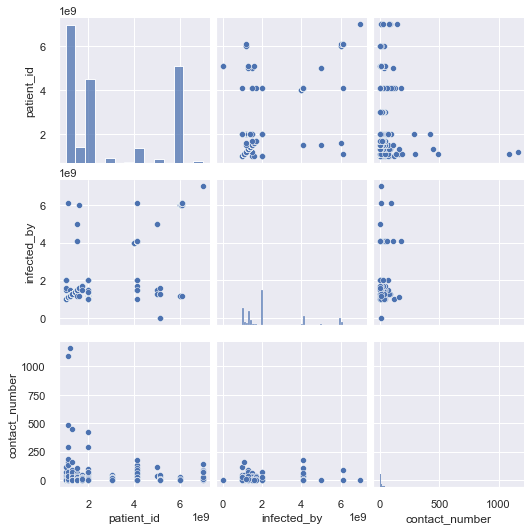

In [16]:
# 페어플롯(여러 변수간 산점도)

sns.pairplot(PI_df,palette='bright')
plt.show()

환자 아이디별로 얼마나 많은 사람들 감겸 시켰는지 확인해 보도록 하자  
타인에게 감염을 많이 시켰다는 의미는, 접촉이 많았다는 것으로 해석 할 수 있다.  
행동적인 관점에서 보면 다음과 같이 해석할 있다.

(1) 움직임이 많은 사람  
(2) 사회적 활동이 많은 사람

In [19]:
# 환자 아이디별로 얼마나 많은 수의 타인을 감염시켰는지 확인하였다.

infected_by_df = pd.DataFrame(infected_by)

infected_by = PI_df['infected_by'].value_counts()
infected_by_list = list(infected_by) # 리스트 형으로 변환

df2 = pd.DataFrame(infected_by_list) # 변환된 리스트형을 데이터 프레임으로 
df2.columns = ['infected_by_sum']    # 컬럼명 변경
df2

,infected_by_sum
0,51
1,27
2,24
3,24
4,21
...,...
601,1
602,1
603,1
604,1


결과를 보면
2000000205 확진자가 무려 51명을 감염을 시킨 것으로 확인된다.

In [122]:
print('감염 시킨 사람수 max: ', infected_by.max())
print('감염 시킨 사람수 min: ', infected_by.min())

감염 시킨 사람수 max:  51
감염 시킨 사람수 min:  1


집단감염 또는 대량감염의 기준을 5명 이상으로 선정하고 집단을 다음과 같이 분류하였다  
(1) 6명 감염이상 (대량 또는 집단 감염을 시킨 집단)  
(2) 5명 감염이하 (소량 또는 개별 감염을 지킨 집단)

In [132]:
# 6명 이상 감염시킨 환자의 id 추출

a = []

condition = (infected_by > 5) # 조건식 작성
infected_over6 = infected_by[condition]
#infected_over6.head()

# 최종 아이디를 추출
id_over6 = infected_over6.index
print(id_over6)
print('6명 이상 감염시킨 인원: ', len(id_over6))

a.append(len(id_over6))

Float64Index([2000000205.0, 4100000008.0, 2000000167.0, 1400000209.0,
              2000000309.0, 4100000006.0, 1000000125.0, 1200000031.0,
              2000000508.0, 2000000476.0, 2000001153.0, 1400000102.0,
              2000000125.0, 2000001076.0, 2000000835.0, 2000000908.0,
              1500000049.0, 6016000009.0, 1000000979.0, 2000000806.0,
              2000000974.0, 2000000114.0, 6016000007.0, 4100000104.0,
              2000000111.0, 2000000139.0, 4100000059.0, 1400000142.0,
              2000001143.0, 1000000991.0, 1000000869.0, 1000000138.0,
              1300000003.0],
             dtype='float64')
6명 이상 감염시킨 인원:  33


In [133]:
# 1 ~ 5 이하 감염시킨 환자의 id 추출

condition = (infected_by <= 5) & (infected_by >= 2) # 조건식 작성
infected_1to5 = infected_by[condition]
infected_1to5.head()

id_under5 = infected_1to5.index
print(id_under5)
print('2~5명 감염시킨 인원: ', len(id_under5))

a.append(len(id_under5))

Float64Index([1400000188.0, 4000000012.0, 6010000001.0, 2000000763.0,
              2000000682.0, 1000000923.0, 1400000132.0, 6100000005.0,
              4100000122.0, 1700000002.0,
              ...
              6100000069.0, 2000000516.0, 2000000889.0, 6100000066.0,
              1000000878.0, 1400000200.0, 2000000617.0, 2000000814.0,
              6016000012.0, 1400000216.0],
             dtype='float64', length=210)
2~5명 감염시킨 인원:  210


In [134]:
# 1명만 감염시킨 환자의 id 추출


condition = (infected_by == 1) # 조건식 작성
infected_1 = infected_by[condition]
infected_1.head()

id_infected1 = infected_1.index
print(id_infected1)
print('1명만 감염시킨 인원: ', len(id_infected1))

a.append(len(id_infected1))

Float64Index([2000000952.0, 1000000953.0, 2000000984.0, 6100000003.0,
              1000001047.0, 2000000874.0, 6100000061.0, 2000000880.0,
              1000000879.0, 2000000788.0,
              ...
              2000000093.0, 2000000080.0, 2000000062.0, 2000000081.0,
              2000000049.0, 2000000050.0, 2000000016.0, 1000000014.0,
              2000000007.0, 7000000009.0],
             dtype='float64', length=363)
1명만 감염시킨 인원:  363


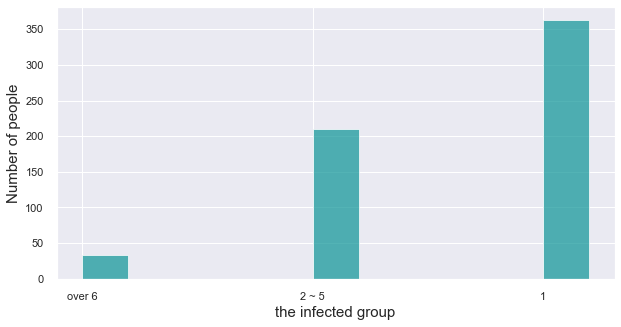

In [135]:
# 그룹별 현황

label = ['over 6', '2 ~ 5', '1']

plt.figure(figsize=(10,5)) 
plt.bar(label, a, color='#0a9396', label='floating', alpha=0.7, width=0.2, align='edge')
plt.xlabel('the infected group', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.show()

### 전체 확진자의 연령 분포
확진자는 20대가 가장 많고 그 뒤로 50, 30, 40대 순서를 보이고 있다.
사회적 활동량이 많은 연령대에서 감염이 많이 이루어 진것으로 생각 할 수 있다.

<AxesSubplot:title={'center':'number of patients in infection_case values'}, xlabel='count', ylabel='age'>

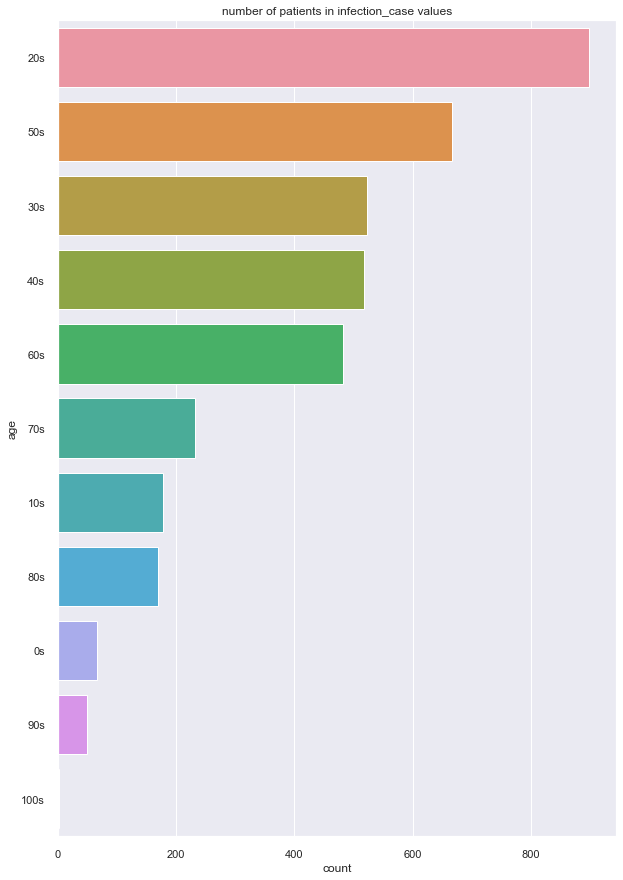

In [136]:
g = PI_df.groupby(['age'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace = True)
g = g.sort_values('count', ascending = False)

plt.figure(figsize = (10,15))
plt.title('number of patients in infection_case values')
sns.barplot(y = 'age', x= 'count', data = g)

### 51 ~ 6명 감염시킨 확진자들의 연령 및 성별 분포

In [137]:
# 각 그룹별 인구 통계학적 정보 추출 (그룹A)

data_sample_1 = pd.DataFrame(columns=PI_df.columns) # 데이터 프레임의 컬럼명을 추출해서 새로운 데이터 프레임을 만든다.

for id in id_over6:

    filtered_df_1 = PI_df[PI_df['patient_id'] == int(id)]
    data_sample_1 = data_sample_1.append(filtered_df_1)
    
data_sample_1.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
2417,2000000205,female,70s,Korea,Gyeonggi-do,Seongnam-si,contact with patient,1000000138.0,8.0,NaN,2020.3.14,NaN,NaN,isolated
3546,4100000008,female,40s,Korea,Chungcheongnam-do,Cheonan-si,gym facility in Cheonan,NaN,130.0,2020.2.20,2020.2.26,2020.3.29,NaN,released
2379,2000000167,female,40s,Korea,Gyeonggi-do,Bucheon-si,contact with patient,1000000125.0,NaN,NaN,2020.3.10,NaN,NaN,isolated
1852,1400000209,female,NaN,Korea,Incheon,Bupyeong-gu,contact with patient,NaN,NaN,NaN,2020.5.31,NaN,NaN,isolated
2521,2000000309,female,80s,Korea,Gyeonggi-do,Gunpo-si,etc,NaN,NaN,2020.3.18,2020.3.19,NaN,NaN,isolated


### 연령별, 성별 분포

<AxesSubplot:xlabel='age', ylabel='province'>

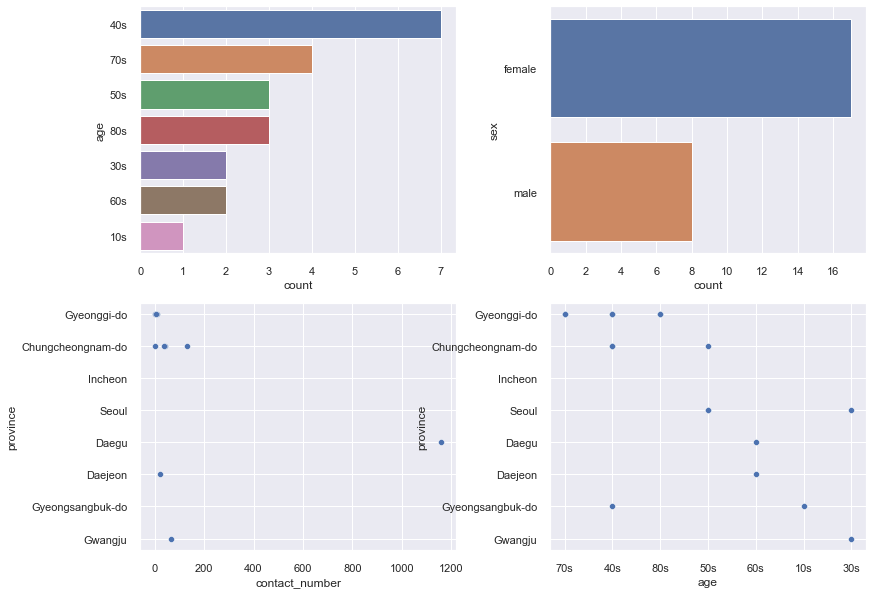

In [194]:
# 연령 데이터
g = data_sample_1.groupby(['age'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace = True)
g = g.sort_values('count', ascending = False)

# 성별 데이터
g2 = data_sample_1.groupby(['sex'])['patient_id'].count()
g2 = g2.reset_index()
g2.rename(columns = {'patient_id':'count'}, inplace = True)
g2 = g2.sort_values('count', ascending = False)


fig = plt.figure(figsize = (13,10))
fig.subplots_adjust(wspace=0.3)
area01 = fig.add_subplot(2, 2, 1)
area02 = fig.add_subplot(2, 2, 2)
area03 = fig.add_subplot(2, 2, 3)
area04 = fig.add_subplot(2, 2, 4)

sns.barplot(y = 'age', x= 'count', data = g, ax=area01)
sns.barplot(y = 'sex', x= 'count', data = g2, ax=area02)

sns.scatterplot(x = 'contact_number', y = 'province', data=data_sample_1, ax=area03)
sns.scatterplot(x = 'age', y = 'province', data=data_sample_1, ax=area04)

<AxesSubplot:xlabel='count', ylabel='province'>

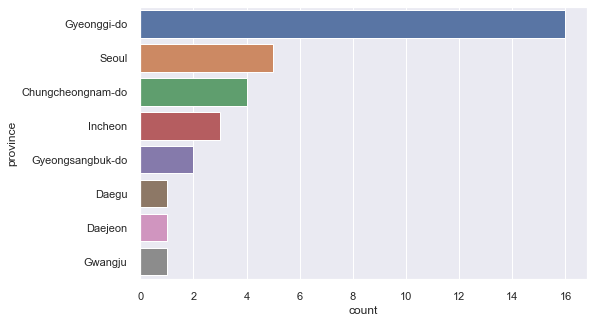

In [139]:
g = data_sample_1.groupby(['province'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace = True)
g = g.sort_values('count', ascending = False)

fig = plt.figure(figsize = (8, 5))
sns.barplot(y = 'province', x= 'count', data = g)

### 2 ~ 5명 감염시킨 확진자들의 연령 및 성별 분포

In [140]:
# 각 그룹별 인구 통계학적 정보 추출 (그룹B)

data_sample_2 = pd.DataFrame(columns=PI_df.columns) # 데이터 프레임의 컬럼명을 추출해서 새로운 데이터 프레임을 만든다.

for id in id_under5:

    filtered_df_2 = PI_df[PI_df['patient_id'] == int(id)]
    data_sample_2 = data_sample_2.append(filtered_df_2)
    
data_sample_2.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
1831,1400000188,female,NaN,Korea,Incheon,Gyeyang-gu,NaN,NaN,NaN,NaN,2020.5.28,NaN,NaN,isolated
3494,4000000012,female,80s,Korea,Chungcheongbuk-do,Goesan-gun,etc,NaN,NaN,NaN,2020.3.4,2020.3.27,NaN,released
4657,6010000001,female,10s,Korea,Gyeongsangbuk-do,Seongju-gun,etc,NaN,NaN,2020.2.24,2020.2.26,NaN,NaN,released
2975,2000000763,female,30s,Korea,Gyeonggi-do,Bucheon-si,etc,NaN,NaN,2020.5.20,2020.5.24,NaN,NaN,isolated
2894,2000000682,male,30s,Korea,Gyeonggi-do,Yongin-si,Itaewon Clubs,NaN,NaN,2020.5.2,2020.5.6,NaN,NaN,isolated


### 연령별, 성별 분포

<AxesSubplot:xlabel='age', ylabel='province'>

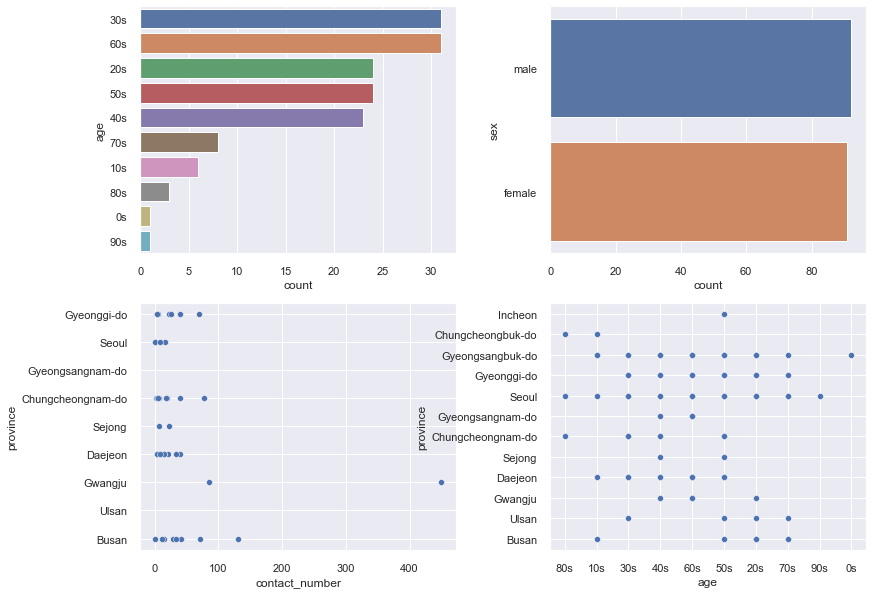

In [193]:
g = data_sample_2.groupby(['age'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace = True)
g = g.sort_values('count', ascending = False)

# 성별 데이터
g2 = data_sample_2.groupby(['sex'])['patient_id'].count()
g2 = g2.reset_index()
g2.rename(columns = {'patient_id':'count'}, inplace = True)
g2 = g2.sort_values('count', ascending = False)

fig = plt.figure(figsize = (13,10))
fig.subplots_adjust(wspace=0.3)
area01 = fig.add_subplot(2, 2, 1)
area02 = fig.add_subplot(2, 2, 2)
area03 = fig.add_subplot(2, 2, 3)
area04 = fig.add_subplot(2, 2, 4)

sns.barplot(y = 'age', x= 'count', data = g, ax=area01)
sns.barplot(y = 'sex', x= 'count', data = g2, ax=area02)

sns.scatterplot(x = 'contact_number', y = 'province', data=data_sample_2, ax=area03)
sns.scatterplot(x = 'age', y = 'province', data=data_sample_2, ax=area04)

<AxesSubplot:xlabel='count', ylabel='province'>

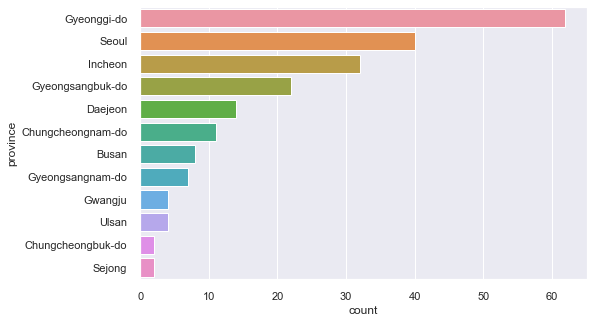

In [142]:
g = data_sample_2.groupby(['province'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace = True)
g = g.sort_values('count', ascending = False)

fig = plt.figure(figsize = (8, 5))
sns.barplot(y = 'province', x= 'count', data = g)

### 1명만 감염시킨 확진자들의 연령 및 성별 분포

In [143]:
# 각 그룹별 인구 통계학적 정보 추출 (그룹C)

data_sample_3 = pd.DataFrame(columns=PI_df.columns) # 데이터 프레임의 컬럼명을 추출해서 새로운 데이터 프레임을 만든다.

for id in id_infected1:

    filtered_df_3 = PI_df[PI_df['patient_id'] == int(float(id))]
    data_sample_3 = data_sample_3.append(filtered_df_3)
    
data_sample_3.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3164,2000000952,NaN,NaN,Korea,Gyeonggi-do,Gwangmyeong-si,contact with patient,1000000991.0,NaN,NaN,2020.6.8,NaN,NaN,isolated
952,1000000953,NaN,NaN,Korea,Seoul,Yongsan-gu,Richway,NaN,NaN,NaN,2020.6.6,NaN,NaN,isolated
3196,2000000984,NaN,NaN,Korea,Gyeonggi-do,Gwangju-si,contact with patient,2000000959.0,NaN,NaN,2020.6.10,NaN,NaN,isolated
5015,6100000003,female,10s,Korea,Gyeongsangnam-do,Jinju-si,Shincheonji Church,NaN,NaN,NaN,2020.2.20,NaN,NaN,released
1046,1000001047,NaN,NaN,Korea,Seoul,etc,NaN,NaN,NaN,NaN,2020.6.10,NaN,NaN,released


### 연령별, 성별 분포

<AxesSubplot:xlabel='age', ylabel='province'>

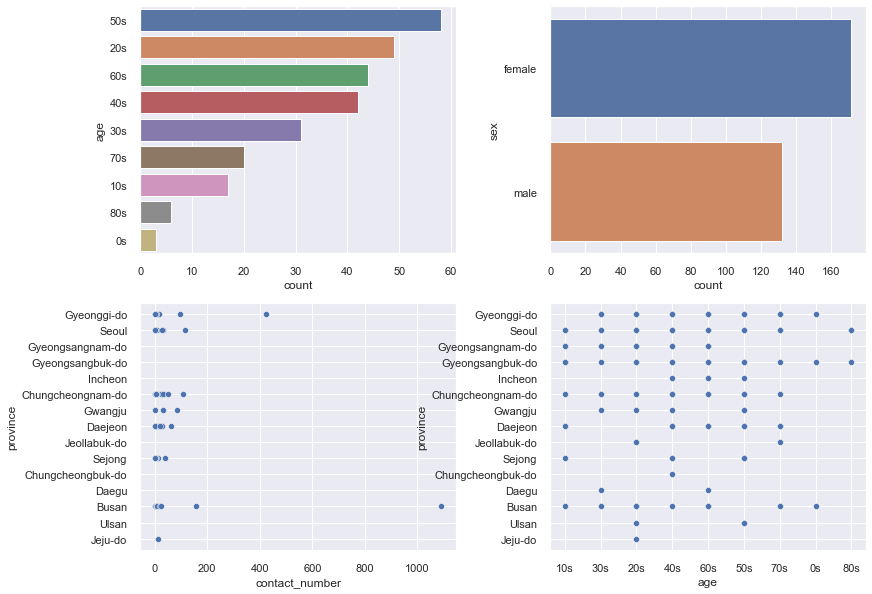

In [197]:
g = data_sample_3.groupby(['age'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace = True)
g = g.sort_values('count', ascending = False)

# 성별 데이터
g2 = data_sample_3.groupby(['sex'])['patient_id'].count()
g2 = g2.reset_index()
g2.rename(columns = {'patient_id':'count'}, inplace = True)
g2 = g2.sort_values('count', ascending = False)


fig = plt.figure(figsize = (13,10))
fig.subplots_adjust(wspace=0.3)
area01 = fig.add_subplot(2, 2, 1)
area02 = fig.add_subplot(2, 2, 2)
area03 = fig.add_subplot(2, 2, 3)
area04 = fig.add_subplot(2, 2, 4)

sns.barplot(y = 'age', x= 'count', data = g, ax=area01)
sns.barplot(y = 'sex', x= 'count', data = g2, ax=area02)

sns.scatterplot(x = 'contact_number', y = 'province', data=data_sample_3, ax=area03)
sns.scatterplot(x = 'age', y = 'province', data=data_sample_3, ax=area04)

### 상대를 많이 감염시킨 사람이 살고 있는 지역
제주도로 도망가자

<AxesSubplot:xlabel='count', ylabel='province'>

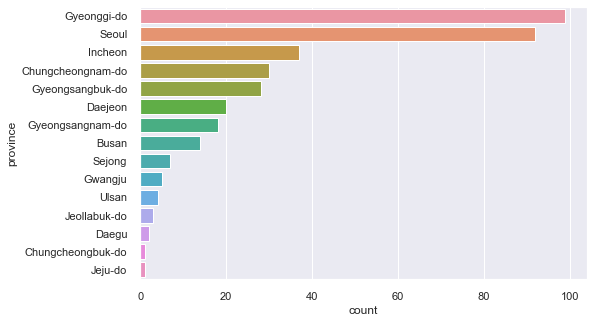

In [145]:
g = data_sample_3.groupby(['province'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace = True)
g = g.sort_values('count', ascending = False)

fig = plt.figure(figsize = (8, 5))
sns.barplot(y = 'province', x= 'count', data = g)

In [147]:
grouped = data_sample_3['patient_id'].groupby(data_sample_3['province'])
grouped.size()

province
Busan                14
Chungcheongbuk-do     1
Chungcheongnam-do    30
Daegu                 2
Daejeon              20
Gwangju               5
Gyeonggi-do          99
Gyeongsangbuk-do     28
Gyeongsangnam-do     18
Incheon              37
Jeju-do               1
Jeollabuk-do          3
Sejong                7
Seoul                92
Ulsan                 4
Name: patient_id, dtype: int64

### 접촉 정도

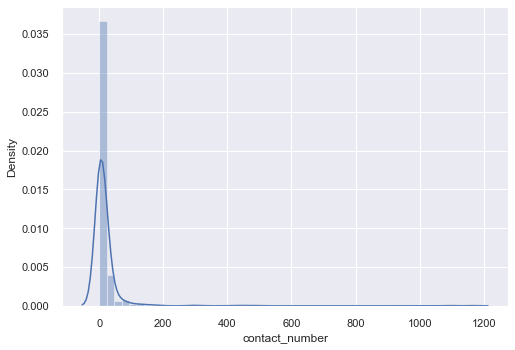

In [148]:
sns.distplot(PI_df['contact_number'])
display()

In [149]:
PI_df['contact_number'].describe()

count     784.000000
mean       17.325255
std        67.533881
min         0.000000
25%         2.000000
50%         4.000000
75%        14.000000
max      1160.000000
Name: contact_number, dtype: float64

In [150]:
# 환자가 얼마나 많은 사람과 접촉하였는지 분석하였다

contact_case = PI_df['contact_number'].value_counts()
print(contact_case)

3.0     96
2.0     92
1.0     87
0.0     83
4.0     51
        ..
47.0     1
46.0     1
64.0     1
66.0     1
72.0     1
Name: contact_number, Length: 84, dtype: int64


In [151]:
contact_case.index.max()

1160.0

확진자가 접촉한 사람들의 수
 
x축은 접촉회수이다.  
y축은 접촉한 사람의 합계이다.
증상이 나타아고 확진되어 격리되기 전까지 3번 접촉한 확진자들의 총합은 96명

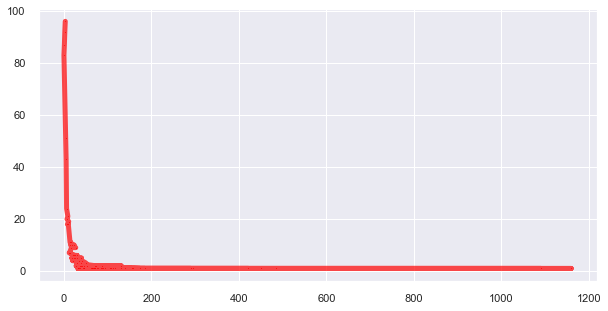

In [152]:
sa = contact_case.index
sa2 = contact_case.values

fig = plt.figure(figsize = (10, 5))
plt.plot(sa, sa2, '-s', color='red', markersize=1, linewidth=5, alpha=0.7)

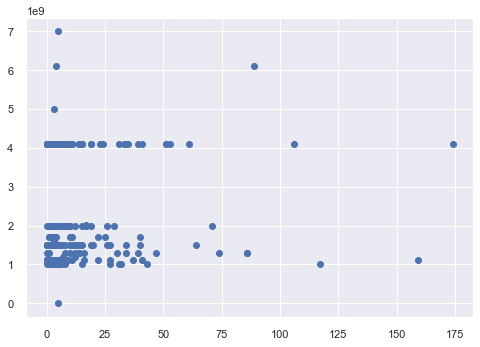

In [153]:
plt.scatter(PI_df['contact_number'],PI_df['infected_by'])
plt.show()

### 연령대별 이동량
연령대별 이동량을 보면 20, 30, 40, 50대가 높은 수준을 보이며 50대 이후부터 확연하 저하 된 것을 확인 할 수 있다.

In [154]:
birth = SF_df.groupby(by = 'birth_year').fp_num.agg('sum')
birth.head()

birth_year
20    5441769700
30    6069018790
40    6054699830
50    5675739830
60    3706127050
Name: fp_num, dtype: int64

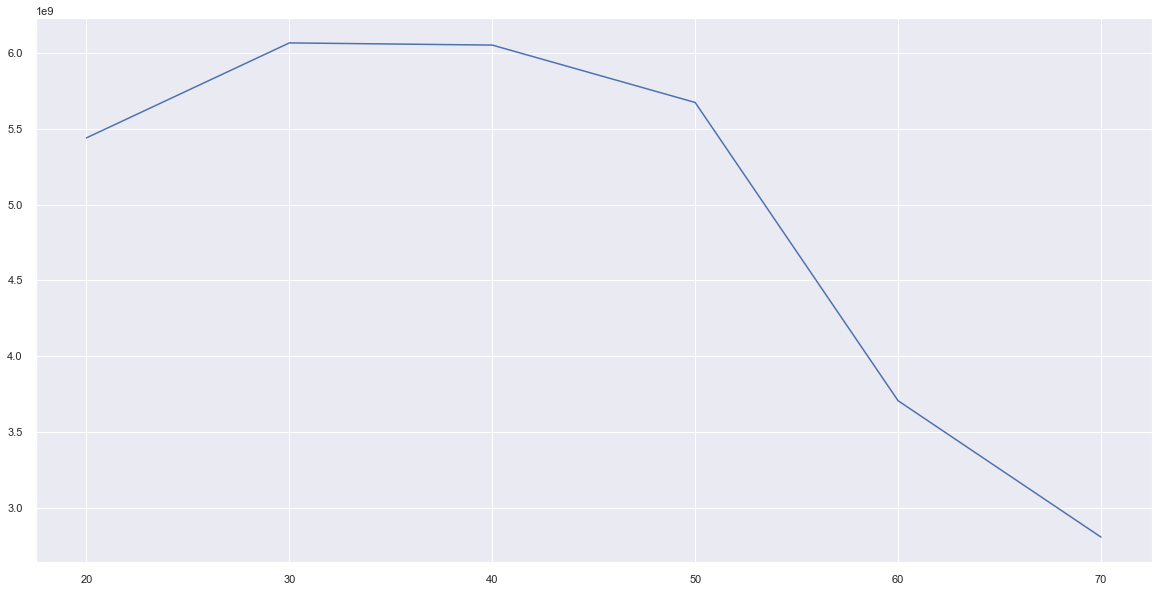

In [155]:
plt.figure(figsize=(20,10)) 
plt.plot(birth)
plt.show()

### 감염경로(infection case)에 대한 분석
감염경로는 확진자와의 직접접촉이 가장 많은 것으로 확인된다.  
나머지 또한 특정 장소에서의 집단감염으로 인한 것이 원인이다.
경로를 알수 없는 감염도 매우 많이 존재 했던 것으로 확인된다.  
나머지 케이스 들은 특정 장소에서의 감염으로 볼 수 있으며 이들은 집단감염과 그렇지 않은 감염으로 구분 할 수 있다.

In [156]:
# 감염경로의 총 개수는 52개로 분류된다.

print('감염경로의 총 개수: ',len(PI_df['infection_case'].unique()))

감염경로의 총 개수:  52


In [157]:
# 감염경로의 결측치 확인, 919개의 결측치가 확인된다.
# 해당 결측치는 감염 경로를 알 수 없는 것으로 파악해야 한다.

PI_df['infection_case'].isnull().sum()

919

<AxesSubplot:title={'center':'number of patients in infection_case values'}, xlabel='count', ylabel='infection_case'>

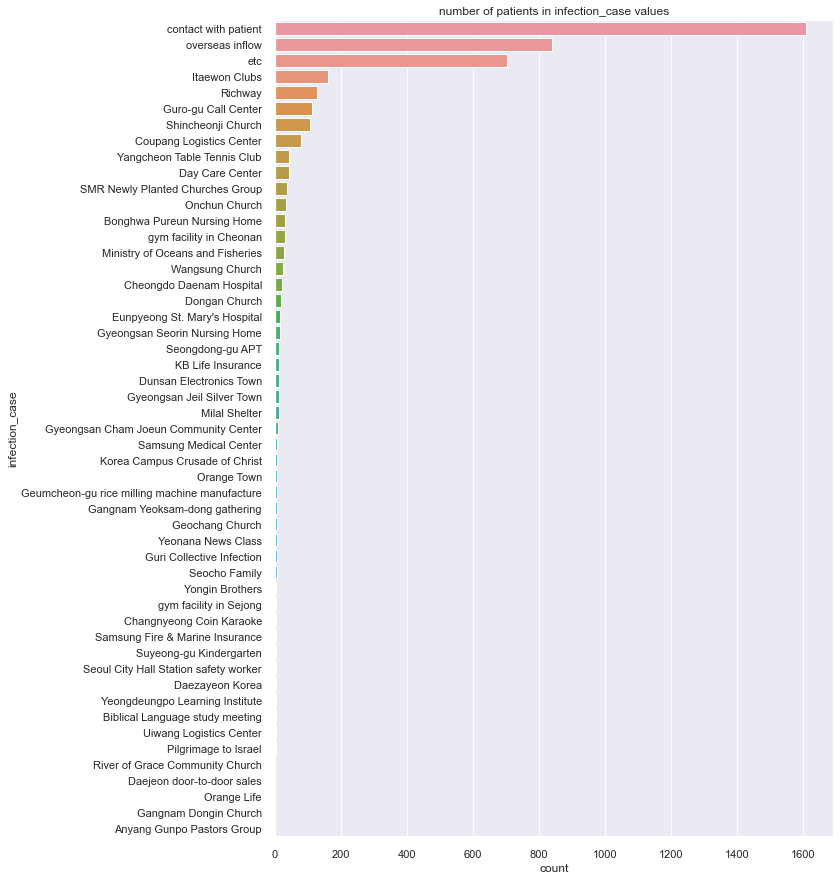

In [158]:
# 장소별 확진자 발생수 시각화

g = PI_df.groupby(['infection_case'])['patient_id'].count()
g = g.reset_index()
g.rename(columns = {'patient_id':'count'}, inplace = True)
g = g.sort_values('count', ascending = False)

plt.figure(figsize = (10,15))
plt.title('number of patients in infection_case values')
sns.barplot(y = 'infection_case', x= 'count', data = g)
#display()

In [159]:
# 필요한 column 추출한다.

C_df_modi = C_df[['city','infection_case', 'confirmed', 'latitude', 'longitude']]
display(C_df_modi.head())

,city,infection_case,confirmed,latitude,longitude
0,Yongsan-gu,Itaewon Clubs,139,37.538621,126.992652
1,Gwanak-gu,Richway,119,37.48208,126.901384
2,Guro-gu,Guro-gu Call Center,95,37.508163,126.884387
3,Yangcheon-gu,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,Dobong-gu,Day Care Center,43,37.679422,127.044374


In [160]:
m = folium.Map([36.4, 128], zoom_start=7)
fg = folium.FeatureGroup(name='My Map')

for index, row in C_df_modi.iterrows():
    if row[3] and row[4] == '-':
        pass
        #print(row[4])
    else:        
        folium.CircleMarker(
            location = [row[3],row[4]],
            fill_color='#ff3399',
            color = '#E91E63',
            radius = row['confirmed']*0.03,
            popup=int(row['confirmed'])
        ).add_to(m)
m

![no_img](./image2/5.png)

![no_img](./image2/1.png)

![no_img](./image2/2.png)

![no_img](./image2/3.png)

## 결론

In [ ]:
1. 20대의 감염이 굉장히 많았다. 
40대 50대 30대 또한 확진자의